# Exploratory Data Analysis

In [66]:
# External libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## ACT

In [67]:
# Load act data
act = pd.read_csv('../data/act_all.csv')

In [68]:
act.head()

,state,participation,composite,year
0,Alabama,1.00,19.2,2017
1,Alaska,0.65,19.8,2017
2,Arizona,0.62,19.7,2017
3,Arkansas,1.00,19.4,2017
4,California,0.31,22.8,2017


In [69]:
def find_mean(nums):
    return sum(nums) / len(nums)

def find_std(nums):
    mu = find_mean(nums)
    return round((sum((n - mu)**2 for n in nums) / len(nums))**(1/2), 4)

# Create standard deviation dictionary
sd_act = {col:find_std(act[col]) for col in act if type(act[col][0]) is not str}

In [70]:
sd_act

{'participation': 0.3336, 'composite': 2.0895, 'year': 0.8165}

## Participation rate trends by state

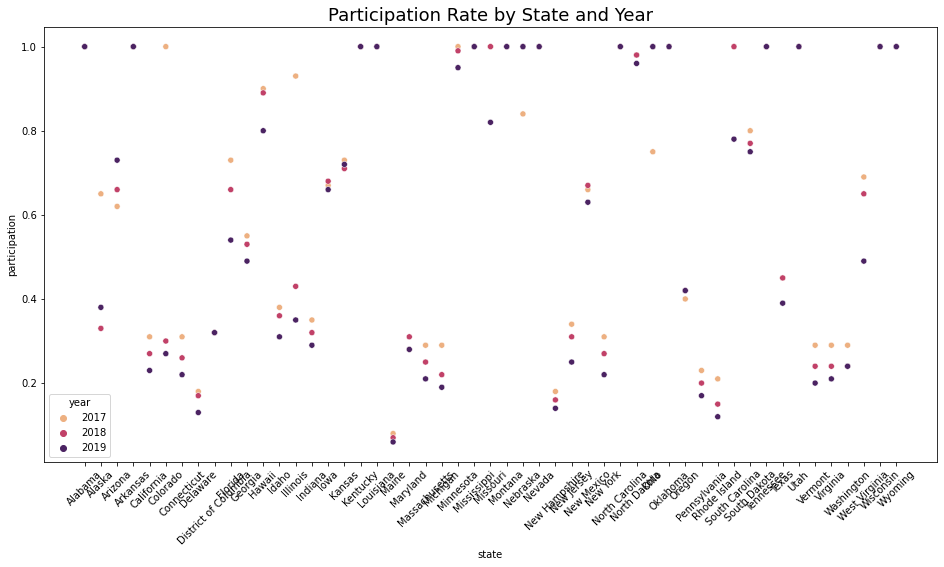

In [71]:
# Plot
plt.figure(figsize=(16,8))
plt.title('Participation Rate by State and Year', size = 18)
plt.xticks(rotation = 45)
sns.scatterplot(x = act['state'], y = act['participation'], hue = act['year'], palette = 'flare');

*Interpretation:* ACT participation rate is falling across the majority of states that do not implement a test-mandatory policy. This plot is for me - I used it to quickly identify trends in participation rate among all 50 states. Do not strain your eyes too hard at this one.

In [72]:
# Percentage of states whose ACT participation decreased/increased
p_17 = act.loc[act['year'] == 2017]['participation'].reset_index(drop=True)
p_19 = act.loc[act['year'] == 2019]['participation'].reset_index(drop=True)
n_declined = sum(p_17 > p_19)
n_increased = sum(p_17 < p_19)

print("Percentage of states whose ACT participation\n")
print(f"Declined: {100 * round(n_declined / len(p_17), 3)}%")
print(f"Increased: {100 * round(n_increased / len(p_17), 3)}%")

Percentage of states whose ACT participation

Declined: 62.7%
Increased: 7.8%


*Interpretation:* Confirmation of the above assesment. Nearly **63%** of states saw a **decline** in ACT participation rate.

## Participation rate distribution

In [73]:
# Gathering participation column's distribution
participation = act.loc[:,['participation']]

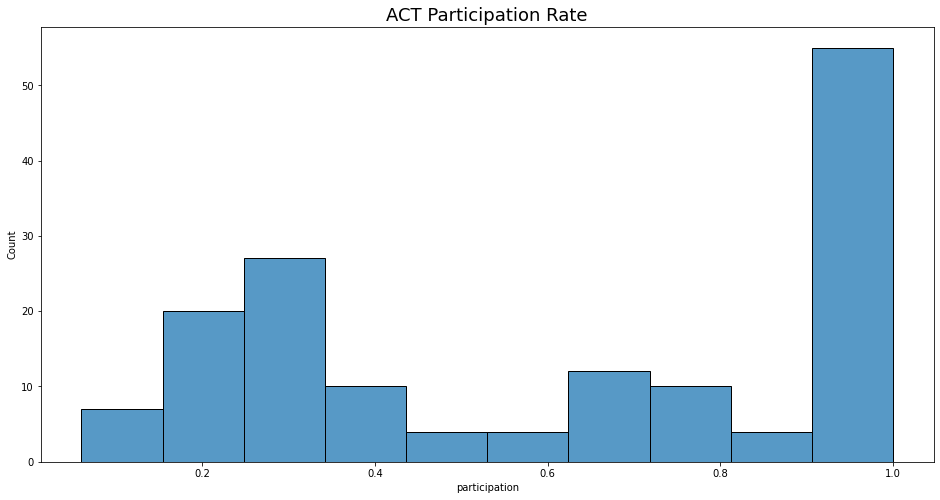

In [74]:
# Plot
plt.figure(figsize=(16,8))
plt.title('ACT Participation Rate', size = 18)
sns.histplot(data = participation, x = 'participation', bins = 10);

*Interpretation:* Note the three peaks in the distribution. The tallest peak comes with a participation rate near 100%.

In [75]:
# Number of states with participation rate less than 100%
participation_state_count = act.groupby('participation').count()['state']

In [76]:
percent = 100 * round(participation_state_count[1.00] / len(act), 3)
print(f"{percent}% of states exhibited 100% participation rate between 2017-2019.")

32.0% of states exhibited 100% participation rate between 2017-2019.


## States with high participation rates

In [77]:
# States with participation rate over 90%
over_90 = act['participation'] > .9
is_2017 = act['year'] == 2017
is_2018 = act['year'] == 2018
is_2019 = act['year'] == 2019

# By year
high_p_17 = act.loc[over_90 & is_2017, :]
high_p_18 = act.loc[over_90 & is_2018, :]
high_p_19 = act.loc[over_90 & is_2019, :]

In [78]:
print("States with over 90% participation rate\n")
print(f"2017: {len(high_p_17.loc[:,'state'].unique())}")
print(f"2018: {len(high_p_18.loc[:,'state'].unique())}")
print(f"2019: {len(high_p_19.loc[:,'state'].unique())}")

States with over 90% participation rate

2017: 19
2018: 19
2019: 17


In [79]:
# States with 100% participation rate
full_participation = act['participation'] > .99

# By year
mandatory_17 = act.loc[full_participation & is_2017, :]
mandatory_18 = act.loc[full_participation & is_2018, :]
mandatory_19 = act.loc[full_participation & is_2019, :]

In [80]:
print("States with 100% participation rate\n")
print(f"2017: {len(mandatory_17.loc[:,'state'].unique())}")
print(f"2018: {len(mandatory_18.loc[:,'state'].unique())}")
print(f"2019: {len(mandatory_19.loc[:,'state'].unique())}")

States with 100% participation rate

2017: 17
2018: 17
2019: 15


*Interpretation:* The ACT lost two state contracts between 2018 and 2019.

## Composite scores of states with 100% ACT participation rate

In [81]:
# All states with 100% participation
mandatory = act.loc[act['participation'] > .99, :]
mandatory.head()

,state,participation,composite,year
0,Alabama,1.0,19.2,2017
3,Arkansas,1.0,19.4,2017
5,Colorado,1.0,20.8,2017
17,Kentucky,1.0,20.0,2017
18,Louisiana,1.0,19.5,2017


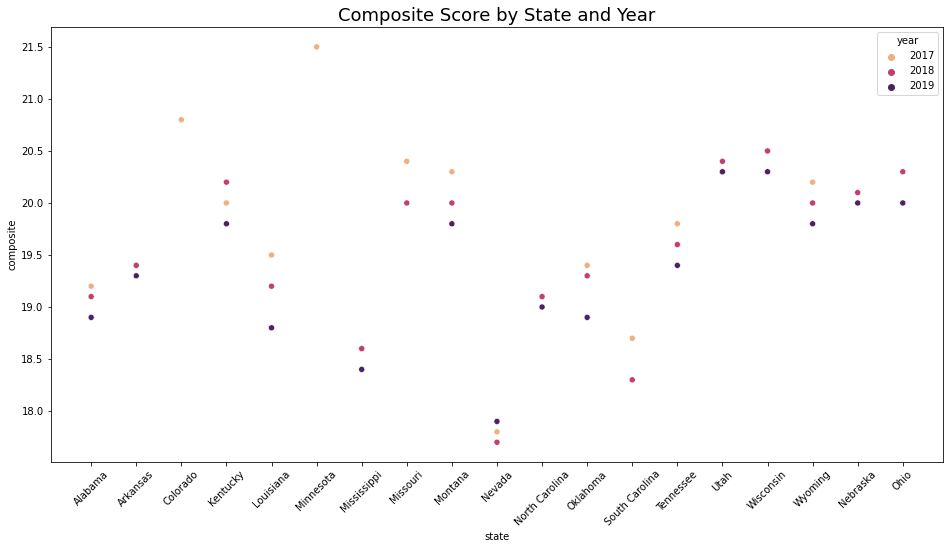

In [82]:
# Plot
plt.figure(figsize=(16,8))
plt.title('Composite Score by State and Year', size = 18)
plt.xticks(rotation = 45)
sns.scatterplot(x = mandatory['state'], y = mandatory['composite'], hue = mandatory['year'], palette = 'flare');

*Interpretation:* 2019 composite scores **decreased** from 2017-2019 in states with a 100% participation rate. States with ACT madatory policies need a remedy to this phenomenon.  
Question: Are college applicants from these states more or less likely to attend a prestigious school, compared to states with lower participation rates?

## Composite Score vs Participation Rate

In [83]:
# Investigate relationship between composite and participation
composite = act.groupby('state').mean().round(3).sort_values('composite').loc[:, ['participation', 'composite']]
composite.head()

,participation,composite
state,,
Nevada,1.000,17.800
Mississippi,1.000,18.533
South Carolina,0.927,18.600
Hawaii,0.863,18.967
Alabama,1.000,19.067


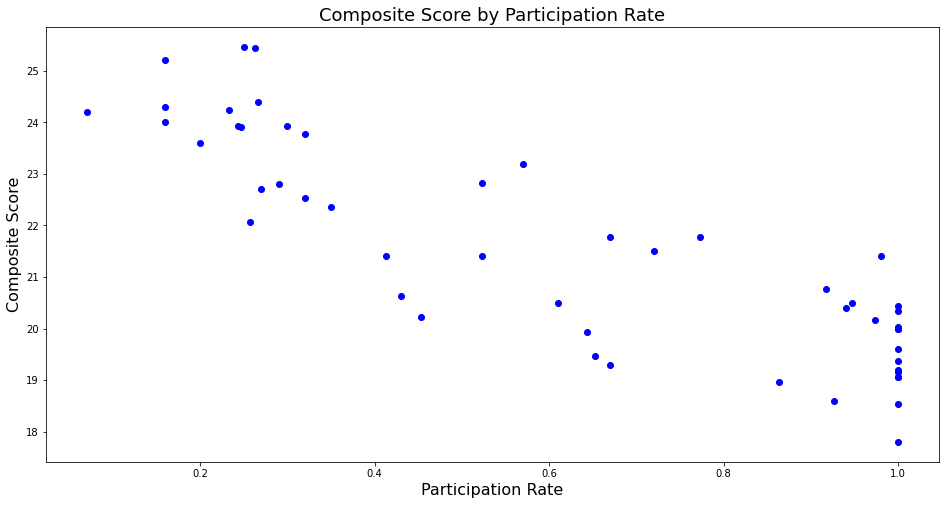

In [84]:
# Plot
plt.figure(figsize=(16,8))
plt.title('Composite Score by Participation Rate', size = 18)
plt.xlabel('Participation Rate', size = 16)
plt.ylabel('Composite Score', size = 16)
plt.plot(composite['participation'], composite['composite'], 'bo');

*Interpretation:* Average score decreases as a higher percentage of students in a state take the ACT. Is the same true for the SAT?

---
## SAT

In [85]:
# Load SAT data
sat = pd.read_csv('../data/sat_all.csv')

In [86]:
sat.head()

,state,participation,ebrw,math,total,year
0,Alabama,0.05,593,572,1165,2017
1,Alaska,0.38,547,533,1080,2017
2,Arizona,0.30,563,553,1116,2017
3,Arkansas,0.03,614,594,1208,2017
4,California,0.53,531,524,1055,2017


In [87]:
# Create standard deviation dictionary
sd_sat = {col:find_std(sat[col]) for col in sat if type(sat[col][0]) is not str}

In [88]:
sd_sat

{'participation': 0.3697,
 'ebrw': 46.1498,
 'math': 63.0394,
 'total': 93.8544,
 'year': 0.8165}

## Participation rate trends by state

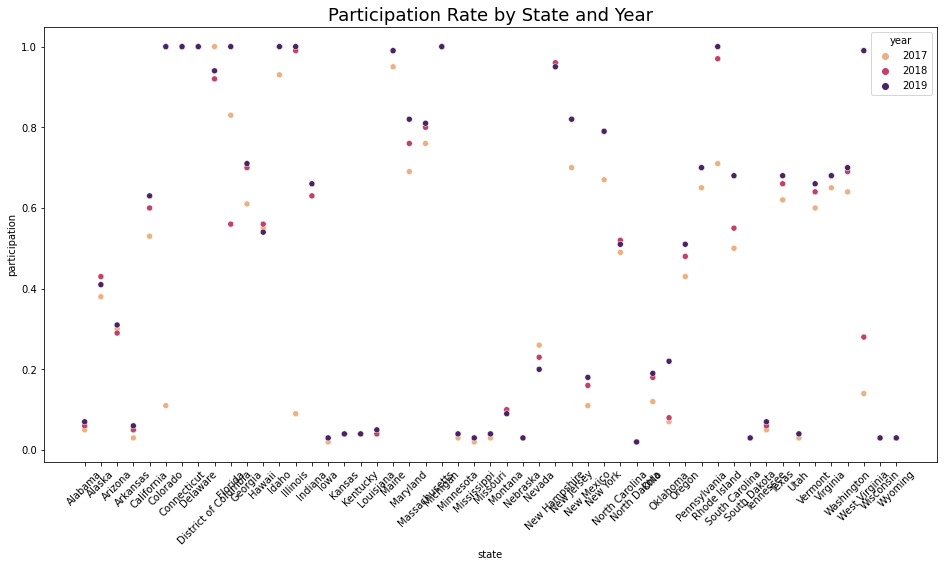

In [89]:
# Plot
plt.figure(figsize=(16,8))
plt.title('Participation Rate by State and Year', size = 18)
plt.xticks(rotation = 45)
sns.scatterplot(x = sat['state'], y = sat['participation'], hue = sat['year'], palette = 'flare');

*Interptretation:* SAT participation rates are increasing for the majority of states. Notice the dark points (2019 data) generally rank higher than the lighter points (2017-18 data). This plot is for me - I used it to quickly identify trends in participation rate among all 50 states. Do not strain your eyes too hard at this one.

In [90]:
# Percentage of states whose SAT participation decreased/increased
p_17 = sat.loc[sat['year'] == 2017]['participation'].reset_index(drop=True)
p_19 = sat.loc[sat['year'] == 2019]['participation'].reset_index(drop=True)
n_declined = sum(p_17 > p_19)
n_increased = sum(p_17 < p_19)

print("Percentage of states whose SAT participation\n")
print(f"Declined: {100 * round(n_declined / len(p_17), 3)}%")
print(f"Increased: {100 * round(n_increased / len(p_17), 3)}%")

Percentage of states whose SAT participation

Declined: 9.8%
Increased: 70.6%


*Interpretation:* Confirmation of the above assesment. Nearly **71%** of states saw **increased** SAT participation rates.

## Participation rate distribution

In [91]:
# Participation distribution
participation = sat.loc[:,['participation']]

In [92]:
participation.head()

,participation
0,0.05
1,0.38
2,0.30
3,0.03
4,0.53


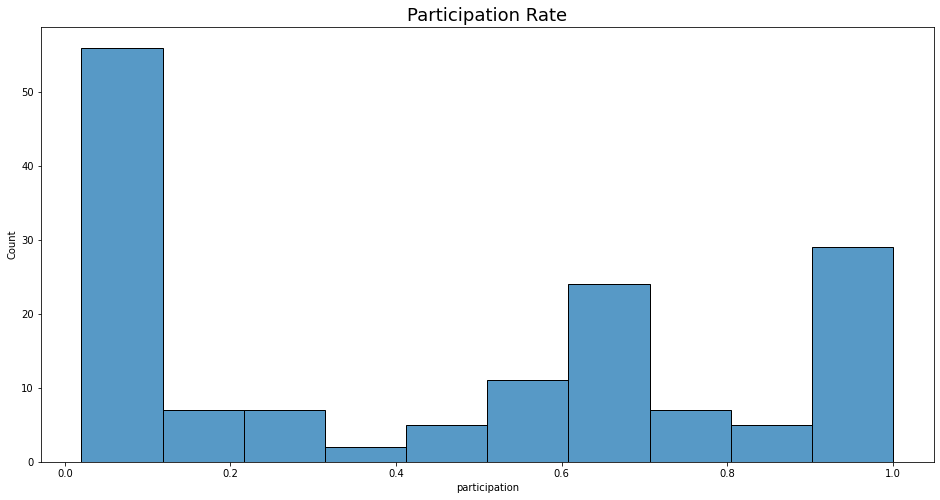

In [93]:
# Plot
plt.figure(figsize=(16,8))
plt.title('Participation Rate', size = 18)
sns.histplot(data = participation, x = 'participation', bins = 10);

*Interpretation:* Note the three peaks in the distribution. The tallest peak aligns with a participation rate of less than 10%. The SAT has long filled a niche for students aiming to attend Ivy League schools. There is a common misconception that Ivy League schools prefer the SAT, which Marlyn McGrath-Lewis, director of admissions at Harvard College, disregards by stating "Either is fine with us, and we don’t have a feeling that either favors students with any particular profile." [original source](https://www.nytimes.com/2007/11/04/education/edlife/guidance.html?pagewanted=all&_r=0) / [alternate source](https://blog.prepscholar.com/what-do-ivy-league-schools-think-of-the-act). Despite this, the misconception makes itself clear in the data.

In [94]:
# Number of states with participation rate less than 100%
participation_state_count = sat.groupby('participation').count()['state']
percent = 100 * round(participation_state_count[1.00] / len(act), 3)
print(f"{percent}% of states exhibited 100% participation rate between 2017-2019.")

11.1% of states exhibited 100% participation rate between 2017-2019.


## States with high participation rates

In [95]:
# States with participation rate over 90%
over_90 = sat['participation'] > .9
is_2017 = sat['year'] == 2017
is_2018 = sat['year'] == 2018
is_2019 = sat['year'] == 2019

# By year
high_p_17 = sat.loc[over_90 & is_2017, :]
high_p_18 = sat.loc[over_90 & is_2018, :]
high_p_19 = sat.loc[over_90 & is_2019, :]

In [96]:
print("States with over 90% participation rate\n")
print(f"2017: {len(high_p_17.loc[:,'state'].unique())}")
print(f"2018: {len(high_p_18.loc[:,'state'].unique())}")
print(f"2019: {len(high_p_19.loc[:,'state'].unique())}")

States with over 90% participation rate

2017: 7
2018: 10
2019: 12


In [97]:
# States with 100% participation rate
full_participation = sat['participation'] > .99

# By year
mandatory_17 = sat.loc[full_participation & is_2017, :]
mandatory_18 = sat.loc[full_participation & is_2018, :]
mandatory_19 = sat.loc[full_participation & is_2019, :]

In [98]:
print("States with 100% participation rate\n")
print(f"2017: {len(mandatory_17.loc[:,'state'].unique())}")
print(f"2018: {len(mandatory_18.loc[:,'state'].unique())}")
print(f"2019: {len(mandatory_19.loc[:,'state'].unique())}")

States with 100% participation rate

2017: 4
2018: 5
2019: 8


*Interpretation:* Four states have signed contracts with the College Board between 2017-2019 to implement state-wide observance of the SAT.

## States with low participation rates

In [99]:
# States with participation rate under 10%
under_10 = sat['participation'] < .1

# By year
low_p_17 = sat.loc[under_10 & is_2017, :]
low_p_18 = sat.loc[under_10 & is_2018, :]
low_p_19 = sat.loc[under_10 & is_2019, :]

In [100]:
print("States with under 10% participation rate\n")
print(f"2017: {len(low_p_17.loc[:,'state'].unique())}")
print(f"2018: {len(low_p_18.loc[:,'state'].unique())}")
print(f"2019: {len(low_p_19.loc[:,'state'].unique())}")

States with under 10% participation rate

2017: 18
2018: 17
2019: 17


In [101]:
# States with participation rate under 5%
under_10 = sat['participation'] < .05

# By year
low_p_17 = sat.loc[under_10 & is_2017, :]
low_p_18 = sat.loc[under_10 & is_2018, :]
low_p_19 = sat.loc[under_10 & is_2019, :]

In [102]:
print("States with under 5% participation rate\n")
print(f"2017: {len(low_p_17.loc[:,'state'].unique())}")
print(f"2018: {len(low_p_18.loc[:,'state'].unique())}")
print(f"2019: {len(low_p_19.loc[:,'state'].unique())}")

States with under 5% participation rate

2017: 14
2018: 13
2019: 12


*Interpretation:* The number of states with extremely low SAT participation have decreased between 2017 and 2019.

## Total Score vs Participation Rate

In [103]:
# Investigate relationship between total score and participation
total_score = sat.groupby('state').mean().round(3).sort_values('total').loc[:, ['participation', 'total']]
total_score.tail()

,participation,total
state,,
Missouri,0.037,1256.333
Iowa,0.027,1261.333
North Dakota,0.020,1267.333
Wisconsin,0.030,1289.333
Minnesota,0.037,1292.333


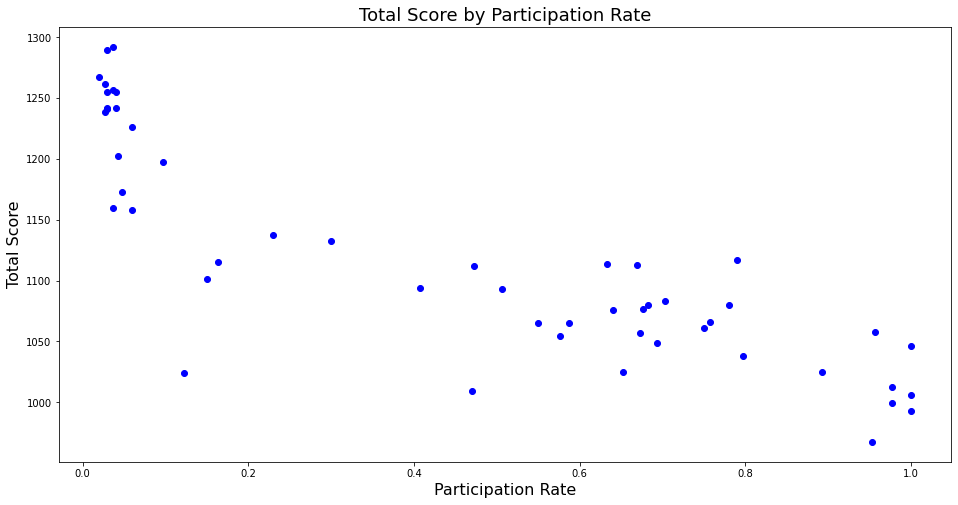

In [104]:
# Plot
total_score.tail()
plt.figure(figsize=(16,8))
plt.title('Total Score by Participation Rate', size = 18)
plt.xlabel('Participation Rate', size = 16)
plt.ylabel('Total Score', size = 16)
plt.plot(total_score['participation'], total_score['total'], 'bo');

*Interpretation:* The SAT follows the same trend as the ACT - Total score and participation rate are negatively correlated. If we are to increase state contracts then average scores are likely to decline. An ethical question is raised: Do students benefit from mandating statewide tests? In order to answer this question we might study the trends in college enrollment from each state that implements a test mandatory policy for high schoolers. An increase in college enrollment rates post-state-mandated testing policy indicates that students in this state benefit by increasing their chances of going to college.

---
## ACT and SAT

## States with low participation rates in both

In [105]:
act.shape

(153, 4)

In [106]:
sat.shape

(153, 6)

In [107]:
# Binary column to identify ACT or SAT
act['is_act'] = 1
sat['is_act'] = 0

In [108]:
# Combine data for ease of analysis
cols = ['state','participation','year','is_act']
combined = pd.concat([act.loc[:,cols], sat.loc[:,cols]])
combined.shape

(306, 4)

In [109]:
# States with participation rate less than 40%
low_p_mask = combined['participation'] < .4

low_p = combined.loc[low_p_mask, :]
low_p.head()

,state,participation,year,is_act
4,California,0.31,2017,1
6,Connecticut,0.31,2017,1
7,Delaware,0.18,2017,1
8,District of Columbia,0.32,2017,1
12,Idaho,0.38,2017,1


In [110]:
# Find the states that have low participation in both ACT and SAT
act_or_sat = low_p.groupby('state')['is_act'].agg(['sum','count'])
mask = (act_or_sat['sum'] != act_or_sat['count']) & (act_or_sat['sum'] != 0)

act_or_sat.loc[mask, :]

,sum,count
state,,
Alaska,2,3
Colorado,2,3
Illinois,1,2


In [111]:
# Investigate the participation rates of the above three states
alaska = combined['state'] == 'Alaska'
colorado = combined['state'] == 'Colorado'
illinois = combined['state'] == 'Illinois'
states = (alaska) | (colorado) | (illinois)

combined.loc[states, :].sort_values(['state','year'])

,state,participation,year,is_act
1,Alaska,0.65,2017,1
1,Alaska,0.38,2017,0
52,Alaska,0.33,2018,1
52,Alaska,0.43,2018,0
103,Alaska,0.38,2019,1
103,Alaska,0.41,2019,0
5,Colorado,1.00,2017,1
5,Colorado,0.11,2017,0
56,Colorado,0.30,2018,1
56,Colorado,1.00,2018,0


*Interpretation:* Every state betrays a preference between ACT, SAT or both. No states have participation rates below 40% for both the ACT and SAT in any year 2017-2019.

## States split between the two tests

In [112]:
# States with participation rate between 35% and 65% for either test in any year 2017-2019
mid_p_mask = (combined['participation'] > .35) & (combined['participation'] < .60)

mid_p = combined.loc[mid_p_mask, :]
mid_p.head()

,state,participation,year,is_act
10,Georgia,0.55,2017,1
12,Idaho,0.38,2017,1
37,Oregon,0.40,2017,1
43,Texas,0.45,2017,1
61,Georgia,0.53,2018,1


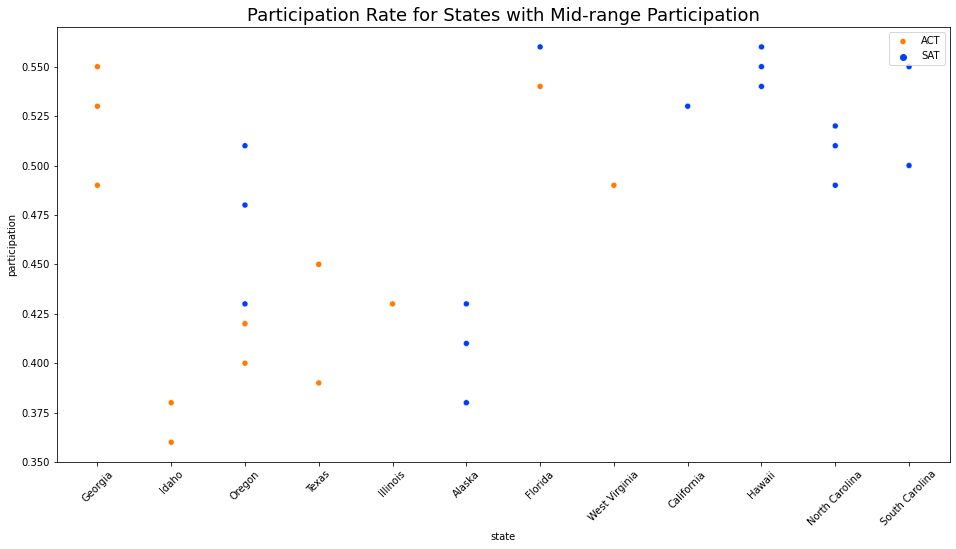

In [113]:
# Plot
plt.figure(figsize=(16,8))
plt.title('Participation Rate for States with Mid-range Participation', size = 18)
plt.xticks(rotation = 45)
sns.scatterplot(x = mid_p['state'], y = mid_p['participation'], hue = mid_p['is_act'], palette = 'bright')
plt.legend(labels=['ACT','SAT']);

*Interpretation:* Notice that Oregon and Florida are the only states that have both ACT and SAT participation rates between 35% and 65%. All other states display exclusively red (ACT) or blue (SAT) data points.

In [114]:
# Selecting all states from the above plot
mid_p_states = mid_p['state'].unique()
is_state = lambda state: state in mid_p_states
states = combined['state'].map(is_state)

# Extracting from combined dataframe
df = combined.loc[states, :].sort_values(['state','year'])

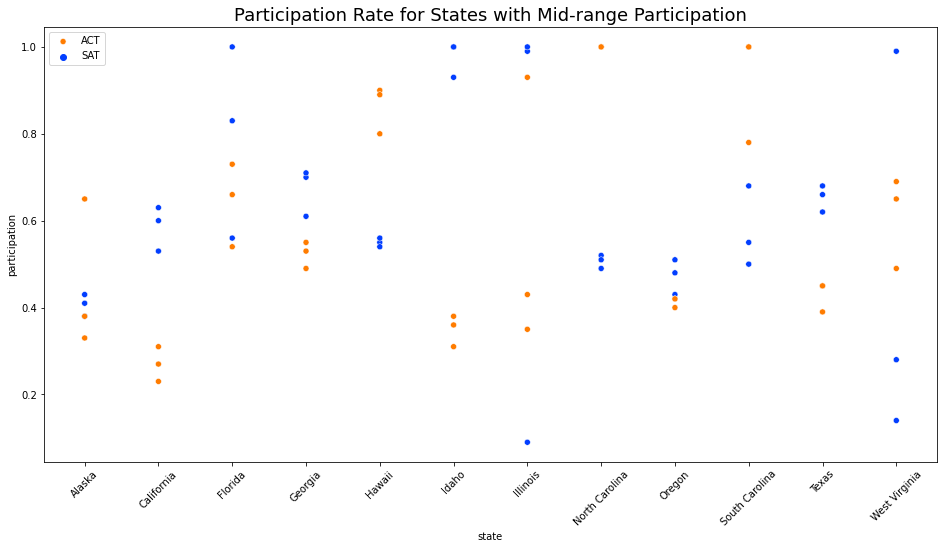

In [115]:
# Plot
plt.figure(figsize=(16,8))
plt.title('Participation Rate for States with Mid-range Participation', size = 18)
plt.xticks(rotation = 45)
sns.scatterplot(x = df['state'], y = df['participation'], hue = df['is_act'], palette = 'bright')
plt.legend(labels=['ACT','SAT']);

*Interpretation:* With this larger perspective we can identify Alaska and Georgia as highly contested states between ACT and SAT participation rates.

## Look at each state individually

### Highest population

In [116]:
# Texas
combined.loc[combined['state']=='Texas', :]

,state,participation,year,is_act
43,Texas,0.45,2017,1
94,Texas,0.45,2018,1
145,Texas,0.39,2019,1
43,Texas,0.62,2017,0
94,Texas,0.66,2018,0
145,Texas,0.68,2019,0


In [117]:
texas = combined.loc[combined['state']=='Texas', :][['participation','year','is_act']].reset_index()

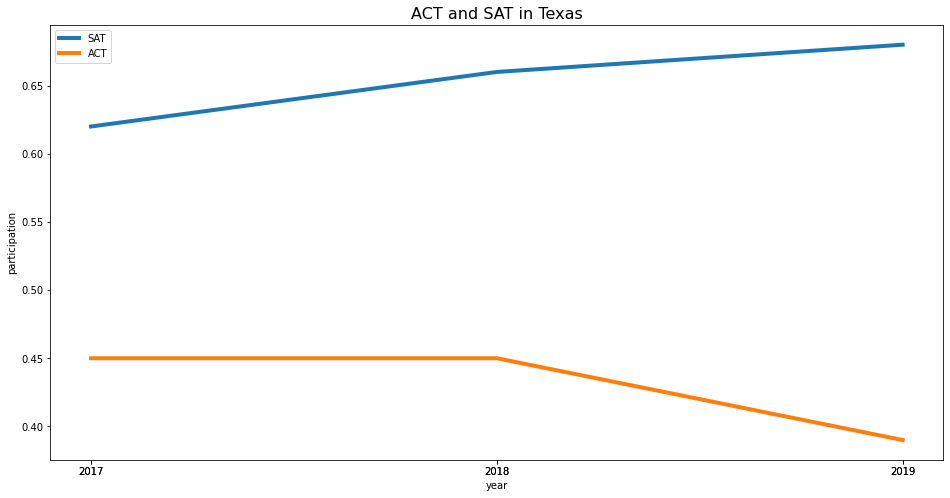

In [118]:
plt.figure(figsize=(16,8))
plt.title('ACT and SAT in Texas', size = 16)
sns.lineplot(x = texas['year'], y = texas['participation'], hue = texas['is_act'], linewidth = 4)
plt.legend(labels=['SAT','ACT'])
plt.xticks(texas['year']);

*Interpretation:* Texas show a clear and increasing SAT preference, but is relatively split compared to the majority of states.

In [119]:
# Florida
combined.loc[combined['state']=='Florida', :]

,state,participation,year,is_act
9,Florida,0.73,2017,1
60,Florida,0.66,2018,1
111,Florida,0.54,2019,1
9,Florida,0.83,2017,0
60,Florida,0.56,2018,0
111,Florida,1.00,2019,0


*Interpretation:* Florida signed up for the SAT in 2019; Has high participation rates in both tests, although ACT participation rates decline 2017-2019.

In [120]:
# California
combined.loc[combined['state']=='California', :]

,state,participation,year,is_act
4,California,0.31,2017,1
55,California,0.27,2018,1
106,California,0.23,2019,1
4,California,0.53,2017,0
55,California,0.60,2018,0
106,California,0.63,2019,0


In [121]:
california = combined.loc[combined['state']=='California', :][['participation','year','is_act']].reset_index()

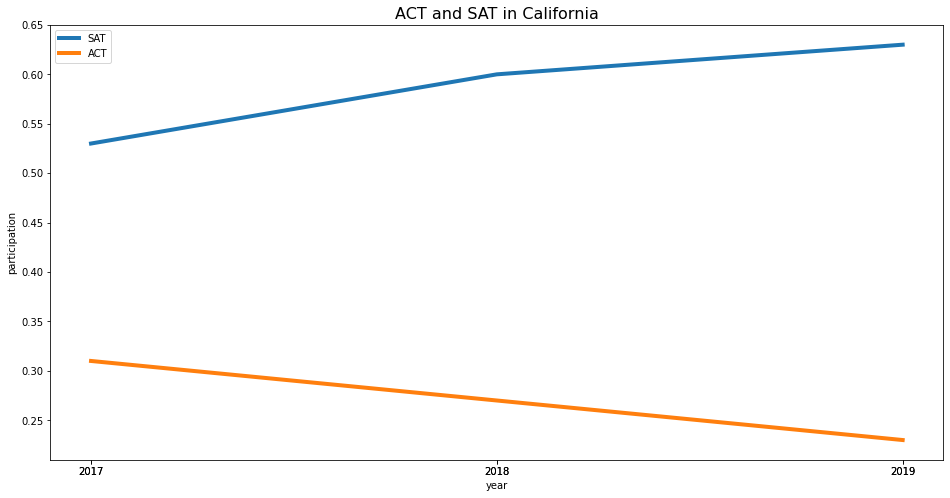

In [122]:
plt.figure(figsize=(16,8))
plt.title('ACT and SAT in California', size = 16)
sns.lineplot(x = california['year'], y = california['participation'], hue = california['is_act'], linewidth = 4)
plt.legend(labels=['SAT','ACT'])
plt.xticks(california['year']);

*Interpretation:* California leans SAT and shows an increasing SAT preference. No state contracts

### States with the closest splits as of 2019

In [123]:
# South Carolina
year_19 = combined['year'] == 2019
combined.loc[(combined['state']=='South Carolina') & year_19, :]

,state,participation,year,is_act
142,South Carolina,0.78,2019,1
142,South Carolina,0.68,2019,0


*Interpretation:* South Carolina left the ACT in 2019; open for the taking

In [124]:
# Oregon
combined.loc[(combined['state']=='Oregon') & year_19, :]

,state,participation,year,is_act
139,Oregon,0.42,2019,1
139,Oregon,0.51,2019,0


*Interpretation:* Oregon displays the most balanced preference between the two tests; open for the taking.

In [125]:
# Georgia
combined.loc[combined['state']=='Georgia', :]

,state,participation,year,is_act
10,Georgia,0.55,2017,1
61,Georgia,0.53,2018,1
112,Georgia,0.49,2019,1
10,Georgia,0.61,2017,0
61,Georgia,0.70,2018,0
112,Georgia,0.71,2019,0


*Interpretation:* Georgia shows a modest preference for the SAT which has increased from 2017-2019.

In [126]:
# Alaska
combined.loc[(combined['state']=='Alaska') & year_19, :]

,state,participation,year,is_act
103,Alaska,0.38,2019,1
103,Alaska,0.41,2019,0


*Interpretation:* Alaska shows an even split; open for the taking.

In [127]:
# North Carolina
combined.loc[(combined['state']=='North Carolina') & year_19, :]

,state,participation,year,is_act
135,North Carolina,1.00,2019,1
135,North Carolina,0.51,2019,0


*Interpretation:* North Carolina has a contract with ACT. Despite this, SAT participation is above 50% and North Carolina may be a steal candidate for the SAT in the coming years.

## Additional Visualizations

### Investigating correlation of numeric features

In [128]:
cols = ['participation','composite','year']
act.loc[:, cols].head()

,participation,composite,year
0,1.00,19.2,2017
1,0.65,19.8,2017
2,0.62,19.7,2017
3,1.00,19.4,2017
4,0.31,22.8,2017


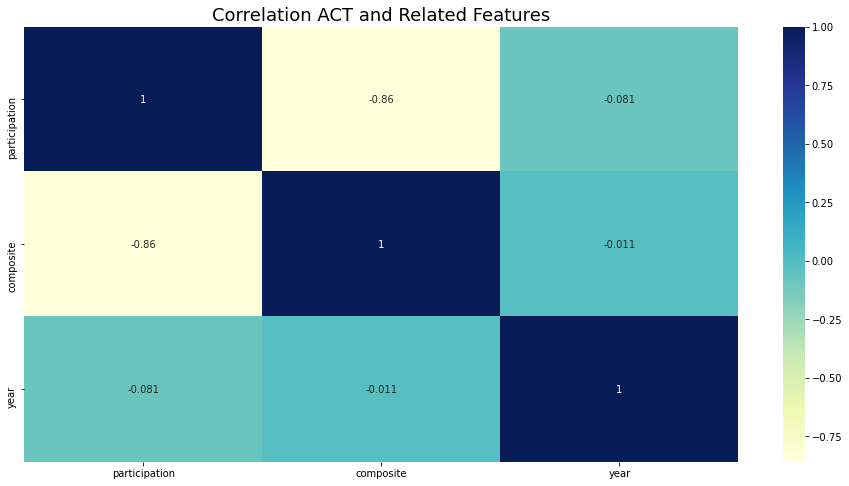

In [129]:
# Plot
plt.figure(figsize=(16,8))
plt.title('Correlation ACT and Related Features', size=18)
sns.heatmap(data = act[cols].corr(), cmap = 'YlGnBu', annot=True);

*Interpretation:* Composite score and participation rate are highly correlated. All other features have low correlation.

In [130]:
cols = ['participation','total','year']

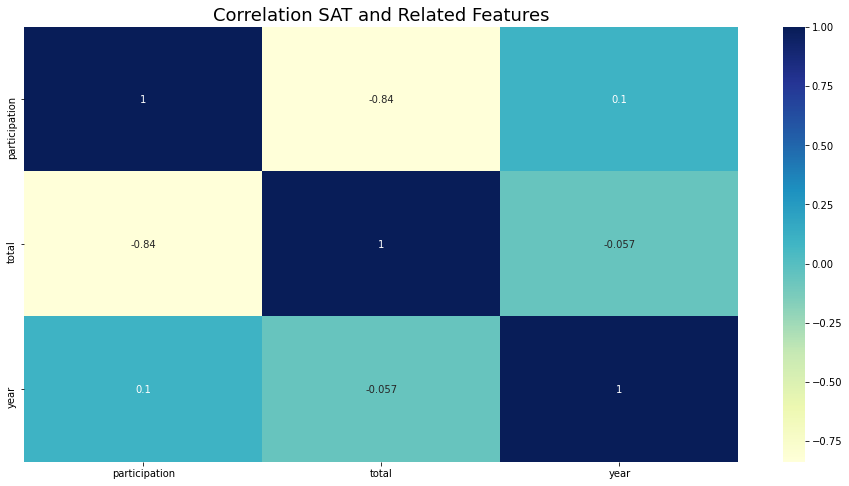

In [131]:
# Plot
plt.figure(figsize=(16,8))
plt.title('Correlation SAT and Related Features', size=18)
sns.heatmap(data = sat[cols].corr(), cmap = 'YlGnBu', annot=True);

*Interpretation:* Same story as the ACT data. Composite score and participation rate are highly correlated. All other features have low correlation.

### Investigating distribution spread and outliers

In [132]:
# First and third quartiles for ACT participation data
q1, q3 = np.percentile(act['participation'], [25 ,75])
print(q1, q3)

0.29 1.0


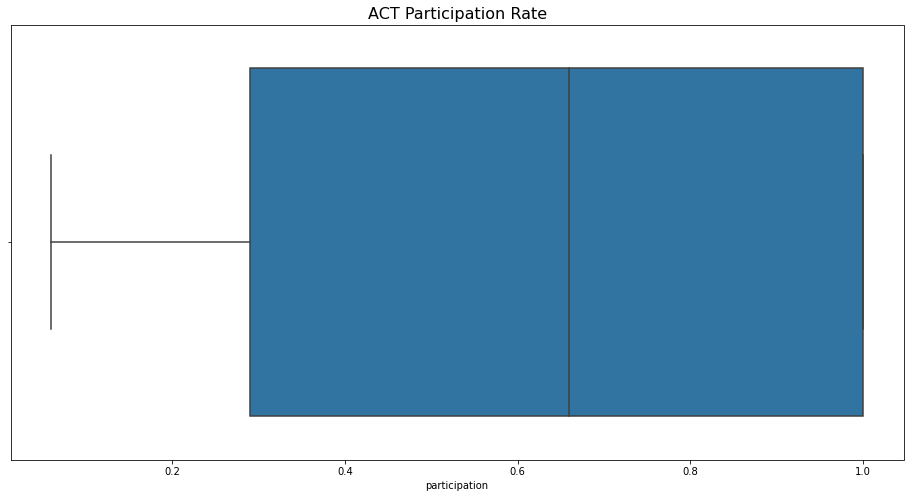

In [133]:
# Plot
plt.figure(figsize=(16,8))
plt.title('ACT Participation Rate', size = 16)
sns.boxplot(data = act, x = 'participation');

*Interpretation:* The participation rate per state is left skewed. 95% of states between 2017-2019 exhibit a participation rate between 29% and 100%.

In [134]:
# First and third quartiles for SAT participation data
q1, q3 = np.percentile(sat['participation'], [25 ,75])
print(q1, q3)

0.04 0.76


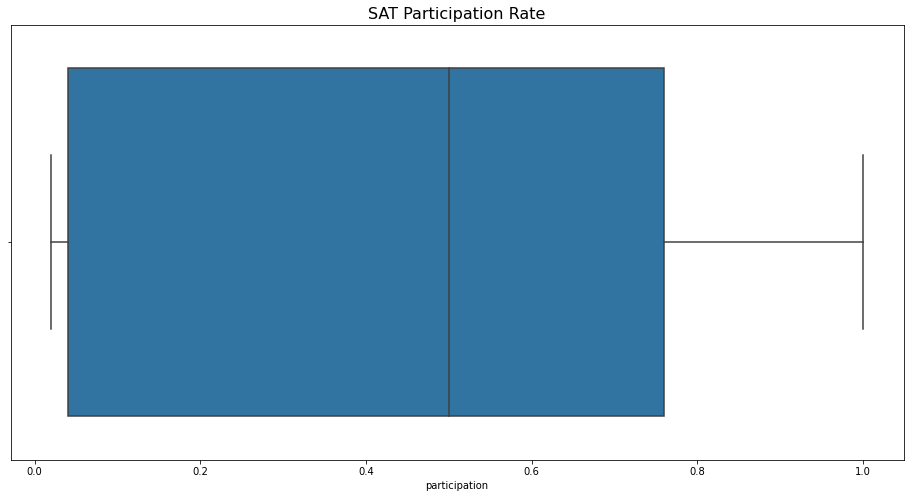

In [135]:
# Plot
plt.figure(figsize=(16,8))
plt.title('SAT Participation Rate', size = 16)
sns.boxplot(data = sat, x = 'participation');

*Interpretation:* The SAT, by contrast, is right skewed. 95% of states between 2017-2019 exhibit a participation rate between 4% and 76%.

*Interpretation:* The ACT commands a higher averge participation rate per state. This is due largely to its state partnership program, which guarentees a 100% participation rate from the fifteen states it has such contracts with.

As the total/composite score is not relevant to my problem statement, I have left the distribution plots of these variables out.

---
# Conclusions

The ACT owes much of its success to its state partnership program. 32% of states exhibited 100% participation rate between 2017-2019. Only 11.1% of states exhibited a 100% participation rate on the SAT during the same time period.

The data demonstrates a clear trend as states shift in participation from the ACT to the SAT. As states end their contracts with ACT, Inc. in favor of the SAT, the College Board must recognize an opportunity to gain a massive boost in test attendance through state partnerships.

Texas and California should be targeted most aggresively for these state contracts, primarily due to their large population size, and also due to their trend towards the SAT from 2017-2019. These two states are available for state contracts and provide the largest potential dividend.